In [1]:
import pandas as pd
import numpy as np
import json

df = pd.read_json("BSO_Data/sample_data/bso_out_1.json")
df.head()

df.drop(columns="DebugInfo", inplace=True)

df.head()

,Results
0,"{'artists': [], 'works': [{'series': [], 'work..."
1,"{'artists': [], 'works': [{'series': [], 'work..."
2,"{'artists': [], 'works': [{'series': [], 'work..."
3,"{'artists': [], 'works': [{'series': [], 'work..."
4,"{'artists': [], 'works': [{'series': [], 'work..."


In [ ]:
jared = pd.read_json("event_data.json")
jared.head()

In [5]:
with open("BSO_Data/sample_data/bso_out_1.json") as f:
    d = json.load(f)

df = pd.json_normalize(d, record_path=["Results"])
df.head()

,artists,works,events,series,eventProgramTitles,EventProgramTitle,EventID,EventProgramNo,EventDate,SeasonTitle,...,DetailLink,ProgramBookLink,conductor.ConductorFullName,venue.VenueLocation,venue.VenueCity,venue.VenueState,venue.VenueCountry,venue.VenueName,orchestra.OrchestraName,season.SeasonName
0,[],"[{'series': [], 'workID': 465543, 'workGroupID...",[],[],"[{'EventTitle': ''}, {'EventTitle': ''}, {'Eve...",,103817,0,2023-06-01T00:00:00,2022-2023 Season,...,Detail.aspx?UniqueKey=103817,,Keith Lockhart,"Boston, MA, U.S.A.",Boston,MA,U.S.A.,Symphony Hall,Boston Pops Orchestra,2022-2023 Season
1,[],"[{'series': [], 'workID': 459861, 'workGroupID...",[],"[{'SeriesName': 'Holiday Pops Concerts', 'Seri...","[{'EventTitle': ''}, {'EventTitle': ''}, {'Eve...",,103952,0,2022-12-10T00:00:00,2022-2023 Season,...,Detail.aspx?UniqueKey=103952,,James Burton,"Boston, MA, U.S.A.",Boston,MA,U.S.A.,Symphony Hall,Boston Pops Orchestra,2022-2023 Season
2,[],"[{'series': [], 'workID': 459460, 'workGroupID...",[],"[{'SeriesName': 'Boston Pops Concerts', 'Serie...","[{'EventTitle': 'Sensory Friendly Concert'}, {...",Sensory Friendly Concert,102856,0,2022-12-03T00:00:00,2022-2023 Season,...,Detail.aspx?UniqueKey=102856,,Keith Lockhart,"Boston, MA, U.S.A.",Boston,MA,U.S.A.,Symphony Hall,Boston Pops Orchestra,2022-2023 Season
3,[],"[{'series': [], 'workID': 459580, 'workGroupID...",[],"[{'SeriesName': 'Holiday Pops Concerts', 'Seri...","[{'EventTitle': ''}, {'EventTitle': ''}, {'Eve...",,103986,0,2022-12-10T00:00:00,2022-2023 Season,...,Detail.aspx?UniqueKey=103986,,Keith Lockhart,"Manchester, NH, U.S.A.",Manchester,NH,U.S.A.,SNHU Arena,Boston Pops Esplanade Orchestra,2022-2023 Season
4,[],"[{'series': [], 'workID': 462497, 'workGroupID...",[],[],[{'EventTitle': ''}],,104420,0,2023-05-27T00:00:00,2022-2023 Season,...,Detail.aspx?UniqueKey=104420,,Keith Lockhart,"Boston, MA, U.S.A.",Boston,MA,U.S.A.,Symphony Hall,Boston Pops Orchestra,2022-2023 Season


FileNotFoundError: File fullhistory.json does not exist

In [6]:
with open ('FullResults_01.json') as f:
    d = json.load(f)

df = pd.json_normalize(d)

bso_only = df[df['orchestra.OrchestraName'] == "Boston Symphony Orchestra"]

works_df = pd.json_normalize(bso_only['works'].explode())

most_popular = works_df['WorkTitle'].value_counts(ascending=False)[:15]

merged_df = pd.merge(most_popular, works_df[['WorkTitle', 'ComposerFullName']], on='WorkTitle', how='left')

merged_df = merged_df.drop_duplicates(subset=['WorkTitle'], keep='first')

merged_df.head()

for index, row in merged_df.iterrows():
    print(str(row['count']) + " - " + row['ComposerFullName'] + ", " + row['WorkTitle'])

506 - Johannes Brahms, Symphony No.   2 in D major, Op. 73
496 - Ludwig van Beethoven, Symphony No.  7 in A major, Op. 92
486 - Ludwig van Beethoven, Symphony No.  5 in C minor, Op. 67
483 - Ludwig van Beethoven, Symphony No.  3 in E-flat major, Op. 55, "Eroica"
475 - Johannes Brahms, Symphony No.   1 in C minor, Op. 68
423 - Johannes Brahms, Symphony No.   4 in E minor, Op. 98
405 - Richard Wagner, Meistersinger: Act 1: Prelude
395 - Pyotr Ilyich Tchaikovsky, Symphony No.  6 in B minor, "Pathétique"
347 - Ludwig van Beethoven, Leonore Overture No. 3, Op. 72b
337 - Claude Debussy, Prélude à l'après-midi d'un faune [Afternoon of a Faun]
322 - Richard Wagner, Tannhäuser: Overture
308 - Maurice Ravel, Daphnis et Chloé: Suite No. 2
307 - Richard Strauss, Till Eulenspiegel's Merry Pranks, Op. 28
303 - Claude Debussy, Mer, La [The Sea]: Three Symphonic Sketches
287 - Ludwig van Beethoven, Symphony No.  6 in F major, Op. 68, "Pastoral"


In [81]:

bso_only.head()

new_df = pd.json_normalize(d, record_path='works', meta=['SeasonTitle', 'EventDateString'])

new_df.head()

,series,workID,workGroupID,WorkTitle,ComposerFullName,Arranger,PerformanceCount,ConductorCount,SoloistCount,ParticipantCount,...,WorkLink,Series,WorkNote,WorkPremiere,Commission,Encores,WorkArtists,WorkDocuments,SeasonTitle,EventDateString
0,[],84806,5320,"Symphony No. 3 in E-flat major, Op. 97, ""Rhe...",Robert Schumann,,0,0,0,0,...,None,None,None,None,,0,[],"[{'WorkDocumentID': 23874, 'WorkDocumentName':...",1916-1917 Season,10-27-1916
1,[],84807,11023,Tristan und Isolde: Act 1: Scene 3: Isolde's N...,Richard Wagner,,0,0,0,0,...,None,None,None,None,,0,"[{'work': None, 'artistInstruments': [], 'seri...","[{'WorkDocumentID': 23874, 'WorkDocumentName':...",1916-1917 Season,10-27-1916
2,[],84808,5813,"Grosse Fuge in B-flat major, Op. 133",Ludwig van Beethoven,Paul Felix Weingartner,0,0,0,0,...,None,None,None,None,,0,[],"[{'WorkDocumentID': 23874, 'WorkDocumentName':...",1916-1917 Season,10-27-1916
3,[],163556,20106,Tristan und Isolde: Prelude and Liebestod with...,Richard Wagner,,0,0,0,0,...,None,None,None,None,,0,"[{'work': None, 'artistInstruments': [], 'seri...","[{'WorkDocumentID': 23874, 'WorkDocumentName':...",1916-1917 Season,10-27-1916
4,[],84998,5013,"Symphony No. 4 in F minor, Op. 36",Pyotr Ilyich Tchaikovsky,,0,0,0,0,...,None,None,None,None,,0,[],[],1916-1917 Season,11-19-1916


In [79]:
works_df.head()

work_set = set()
for idx, row in works_df.iterrows():

    workName = row['WorkTitle']
    workName_lower = workName.casefold()

    if "violin" in workName_lower:
        work_set.add(workName)

title_counts = works_df['WorkTitle'].value_counts()
filtered_counts = title_counts[title_counts.index.isin(work_set)]

concerto_frame = pd.DataFrame(filtered_counts)

concerto_merge = pd.merge(concerto_frame, works_df[['WorkTitle', 'ComposerFullName']], on='WorkTitle', how='left')

concerto_merge = concerto_merge.drop_duplicates(subset=['WorkTitle'], keep='first')
concerto_merge = concerto_merge.reset_index()

for idx, row in concerto_merge.iterrows():
    if idx > 20:
        break
    print(str(row['count']) + '-' + row['ComposerFullName'] + ", " + row['WorkTitle'])


235-Ludwig van Beethoven, Concerto for Violin in D major, Op. 61
209-Johannes Brahms, Concerto for Violin in D major, Op. 77
177-Pyotr Ilyich Tchaikovsky, Concerto for Violin in D Major, Op. 35
165-Felix Mendelssohn, Concerto for Violin in E minor, Op. 64
117-Jean Sibelius, Concerto for Violin in D minor, Op. 47
101-Max Bruch, Concerto for Violin No.   1 in G minor, Op. 26
81-Gyorgy Ligeti, Concerto for Violin
64-Johannes Brahms, Concerto for Violin and Cello in A minor, Op. 102
57-Antonin Dvorák, Concerto for Violin in A minor, Op. 53
57-Camille Saint-Saëns, Concerto for Violin No.   3 in B minor, Op. 61
56-Wolfgang Amadeus Mozart, Concerto for Violin No. 4 in D major, K. 218
51-Wolfgang Amadeus Mozart, Concerto for Violin No. 5 in A major, K. 219
50-Igor Stravinsky, Concerto for Violin in D major
50-Wolfgang Amadeus Mozart, Sinfonia Concertante for Violin and Viola in E-flat major, K. 320d (364)
47-Wolfgang Amadeus Mozart, Concerto for Violin No. 3 in G major, K. 216
47-Sergei Prokof

In [85]:
mydf = pd.DataFrame()
for idx, row in concerto_merge.iterrows():
    if idx > 0:
        break
    temp_df = new_df[new_df['WorkTitle'] == row['WorkTitle']]
    mydf = temp_df
    for t_index, t_row in temp_df.iterrows():
        print(t_row['ComposerFullName'] + ", " + t_row['WorkTitle'] + " " + t_row['EventDateString'] + " " + t_row['SeasonTitle'])


Ludwig van Beethoven, Concerto for Violin in D major, Op. 61 01-13-1917 1916-1917 Season
Ludwig van Beethoven, Concerto for Violin in D major, Op. 61 01-12-1917 1916-1917 Season
Ludwig van Beethoven, Concerto for Violin in D major, Op. 61 10-30-1885 1885-1886 Season
Ludwig van Beethoven, Concerto for Violin in D major, Op. 61 12-06-1888 1888-1889 Season
Ludwig van Beethoven, Concerto for Violin in D major, Op. 61 11-03-1888 1888-1889 Season
Ludwig van Beethoven, Concerto for Violin in D major, Op. 61 11-02-1888 1888-1889 Season
Ludwig van Beethoven, Concerto for Violin in D major, Op. 61 01-03-1919 1918-1919 Season
Ludwig van Beethoven, Concerto for Violin in D major, Op. 61 01-04-1919 1918-1919 Season
Ludwig van Beethoven, Concerto for Violin in D major, Op. 61 12-09-1904 1904-1905 Season
Ludwig van Beethoven, Concerto for Violin in D major, Op. 61 02-14-1887 1886-1887 Season
Ludwig van Beethoven, Concerto for Violin in D major, Op. 61 02-23-1901 1900-1901 Season
Ludwig van Beethoven,

In [186]:
import matplotlib.pyplot as plt
mydf.head()
#x is year
#y is occurrences
season_occurrences = mydf['SeasonTitle'].value_counts()

#b = pd.Series([20], index=["2024-2025 Season"])
#season_occurrences = season_occurrences.add(b, fill_value=0)

#for index, value in season_occurrences.items():
# nullSeasons = []
# emptyCounts = []
# for i in range(len(season_occurrences.index) - 1):
#     if int(season_occurrences.index[i][0:4]) + 1 != int(season_occurrences.index[i+1][0:4]):
#         current_year = int(season_occurrences.index[i][0:4])
#         next_year = current_year + 1
#
#         missing_index = str(current_year + 1) + "-" + str(next_year + 1) + " Season"
#         nullSeasons += [missing_index]
#         emptyCounts += [0]
#
# missing_seasons = pd.Series(emptyCounts, nullSeasons)
#
# season_occurrences = season_occurrences.add(missing_seasons, fill_value=0)

season_occurrences = season_occurrences.sort_index()

seasonCounts = season_occurrences.tolist()
seasonYears = [x for x in range(1883, 2023)]

partial_indices = list(season_occurrences.index)
partial_years = [int(x[0:4]) for x in partial_indices]

current_index = 0
new_occurrences = []
new_years = []
for i in range(len(partial_years) - 1):
    year = partial_years[i]
    next_year = partial_years[i + 1]

    new_years += [year]
    new_occurrences += [season_occurrences.values[i]]
    if year + 1 != next_year:
        while year + 1 != next_year:
            new_years += [year + 1]
            new_occurrences += [0]
            year += 1


final_series = pd.Series(new_occurrences, new_years)

final_series
# plt.figure().set_figwidth(30)
# plt.plot(final_series)
# ax = plt.gca()
# ax.set_ylim([0,9])
# plt.show()


1883    2
1884    0
1885    2
1886    2
1887    0
       ..
2016    1
2017    0
2018    1
2019    4
2020    1
Length: 138, dtype: int64

<Figure size 2000x480 with 0 Axes>

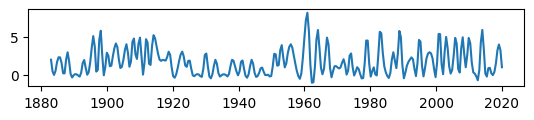

In [204]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

np_years = np.array(new_years)
np_occurrences = np.array(new_occurrences)

xnew = np.linspace(np_years.min(), np_years.max(), 300)
spl = make_interp_spline(np_years, np_occurrences, k=2)
power_smooth = spl(xnew)

plt.figure().set_figwidth(20)
plt.figure().set_figheight(1)
plt.plot(xnew, power_smooth)
plt.show()

In [76]:
#ChatGPT for the win

data = {
    'EventDate': ['10-26-2022', '10-27-2022', '10-28-2022'],
    'Fruits': [
        [{'fruitName': 'Pear', 'size': 'Medium'}, {'fruitName': 'Orange', 'size': 'Large'}],
        [{'fruitName': 'Apple', 'size': 'Small'}],
        [{'fruitName': 'Banana', 'size': 'Medium'}, {'fruitName': 'Kiwi', 'size': 'Small'}]
    ]
}

df = pd.DataFrame(data)

# Create an empty DataFrame to store normalized data
normalized_df = pd.DataFrame(columns=['EventDate', 'fruitName', 'size'])

# Iterate over each row in the original DataFrame
for index, row in df.iterrows():
    event_date = row['EventDate']
    fruits_list = row['Fruits']

    # Iterate over each fruit in the list
    for fruit in fruits_list:
        fruit_name = fruit['fruitName']
        fruit_size = fruit['size']

        # Append the data to the normalized DataFrame
        # normalized_df = normalized_df + pd.DataFrame({'EventDate': event_date, 'fruitName': fruit_name, 'size': fruit_size})
        add_df = pd.DataFrame({'EventDate': [event_date], 'fruitName': [fruit_name], 'size': [fruit_size]})
        normalized_df = pd.concat([normalized_df, add_df])

print(normalized_df)


    EventDate fruitName    size
0  10-26-2022      Pear  Medium
0  10-26-2022    Orange   Large
0  10-27-2022     Apple   Small
0  10-28-2022    Banana  Medium
0  10-28-2022      Kiwi   Small


In [4]:
import json
import pandas as pd

In [2]:
data = json.load(open("event_data.json", "r"))

In [5]:
jared = pd.DataFrame.from_dict(data, orient="index")


AttributeError: 'list' object has no attribute 'values'